EDA 

Emily Yao, yaowemily@gmail.com, United States of America, University of Florida, Data Science

Problem description:
Persistence of drugs, otherwise defined as the duration between initial drug use and its discontinuation, is a big challenge for Pharmaceutical companies. However, with the use of machine learning, we can automate its identification by gathering insights on the factors impacting drug persistence.

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statistics
import plotly.express as px
import seaborn as sea
import scipy.stats as stats

In [136]:
df = pd.read_excel("https://github.com/qngyn/DataGlacier-Healthcare/blob/main/Data.xlsx?raw=true")

Cleaning the dataset: implementing code for selected methods from week 9

In [137]:
#skewness & outliers
Q1 = df['Dexa_Freq_During_Rx'].quantile(0.25)
Q3 = df['Dexa_Freq_During_Rx'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Dexa_Freq_During_Rx'] = np.where(df['Dexa_Freq_During_Rx']>upper_whisker,upper_whisker,np.where(df['Dexa_Freq_During_Rx']<lower_whisker,lower_whisker,df['Dexa_Freq_During_Rx']))

Q1 = df['Count_Of_Risks'].quantile(0.25)
Q3 = df['Count_Of_Risks'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Count_Of_Risks'] = np.where(df['Count_Of_Risks']>upper_whisker,upper_whisker,np.where(df['Count_Of_Risks']<lower_whisker,lower_whisker,df['Count_Of_Risks']))

df

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0.0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0.0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2.0
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1.0
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1.0
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0.0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1.0
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0.0


In [138]:
#missing information
df = df.replace('Unknown', np.NaN) 
df = df.fillna(method = 'bfill', limit = 1)
df = df.fillna(method = 'ffill', limit = 1)
df.fillna(df.median(numeric_only=True).round(1), inplace=True)
df

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0.0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0.0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2.0
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1.0
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1.0
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0.0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1.0
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,ENDOCRINOLOGY,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0.0


In [139]:
df.skew(axis = 0, skipna = True)

<ipython-input-139-c789b15bf834>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis = 0, skipna = True)


Dexa_Freq_During_Rx    1.254572
Count_Of_Risks         0.778326
dtype: float64

In [140]:
df.shape

(3424, 69)

In [141]:
df.head

<bound method NDFrame.head of        Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
0        P1       Persistent    Male      Caucasian  Not Hispanic     West   
1        P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2        P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3        P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4        P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
...     ...              ...     ...            ...           ...      ...   
3419  P3420       Persistent  Female      Caucasian  Not Hispanic    South   
3420  P3421       Persistent  Female      Caucasian  Not Hispanic    South   
3421  P3422       Persistent  Female      Caucasian  Not Hispanic    South   
3422  P3423   Non-Persistent  Female      Caucasian  Not Hispanic    South   
3423  P3424   Non-Persistent  Female      Caucasian  Not Hispanic    South   

     Age_Bucket        Ntm_Specia

In [142]:
df.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Com

In [143]:
numeric_features = df[["Dexa_Freq_During_Rx","Count_Of_Risks"]]

Analyzing Relationships Between Variables (Categorical Data Analysis)

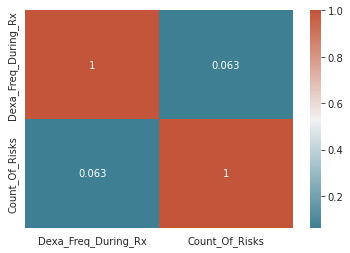

In [144]:
#correlation matrix
correlationmap = df.corr()# 
sea.heatmap(correlationmap, xticklabels = correlationmap.columns, yticklabels = correlationmap.columns, annot=True, cmap = sea.diverging_palette(220, 20, as_cmap=True))
#very weak positive correlation between the two quantitative variables

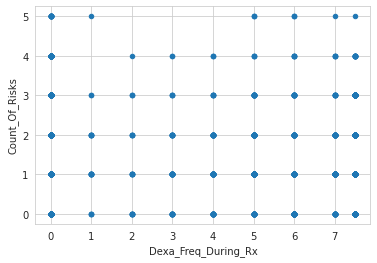

In [145]:
#Vizaulization
df.plot(kind='scatter', x='Dexa_Freq_During_Rx', y='Count_Of_Risks') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb19f912490>,
      dtype=object)

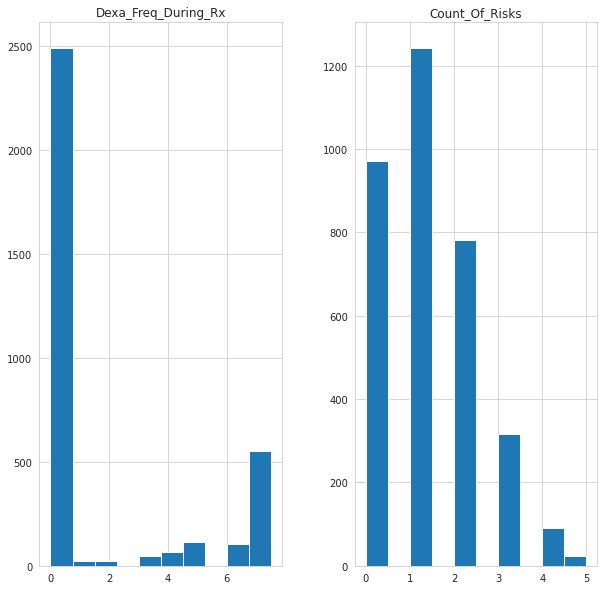

In [146]:
numeric_features.hist(figsize=[10,10])
#gives us distribution of quantitative data

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

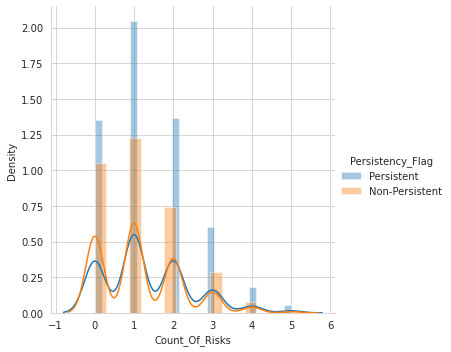

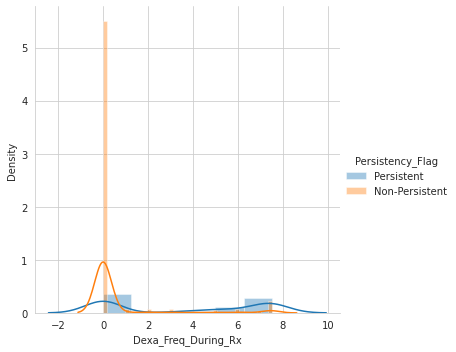

In [147]:
sea.FacetGrid(df,hue="Persistency_Flag",height = 5).map(sea.distplot,"Count_Of_Risks"). add_legend()
sea.FacetGrid(df,hue="Persistency_Flag",height = 5).map(sea.distplot,"Dexa_Freq_During_Rx"). add_legend()
#PDF to show overlap

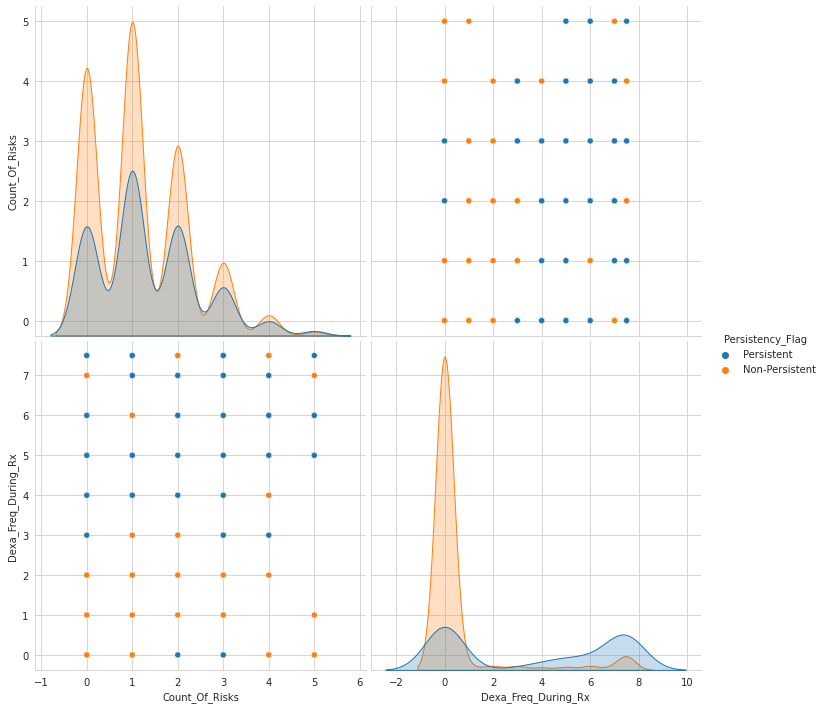

In [148]:
numeric_features = df[["Count_Of_Risks","Persistency_Flag","Dexa_Freq_During_Rx"]]
sea.set_style("whitegrid")
sea.pairplot(numeric_features, hue = "Persistency_Flag", height = 5)

Categorical Data Analysis

In [149]:
Persistency_Data = df[(df["Persistency_Flag"] == "Persistent")]
Persistency_Data

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0.0
15,P16,Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1.0
20,P21,Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0.0
40,P41,Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1.0
65,P66,Persistent,Female,Asian,Not Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3414,P3415,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0.0
3416,P3417,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,2.0
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1.0
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0.0


In [150]:
Nonpersistency_Data = df[(df["Persistency_Flag"] == "Non-Persistent")]
Nonpersistency_Data

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0.0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2.0
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1.0
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1.0
5,P6,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,Y,N,N,N,N,N,N,N,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,P3416,Non-Persistent,Female,Caucasian,Not Hispanic,South,>75,ORTHOPEDICS,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,Y,N,N,N,N,N,1.0
3417,P3418,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1.0
3418,P3419,Non-Persistent,Female,Caucasian,Not Hispanic,South,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1.0
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,ENDOCRINOLOGY,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0.0


In [151]:
df_categorical = df.select_dtypes(include = 'object').copy()
df_categorical.head(10)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,N
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,N
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,N
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,N
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,N
5,P6,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,N
6,P7,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,N
7,P8,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,N
8,P9,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,N
9,P10,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,N


General # of males: 
194
General # of females: 
3230


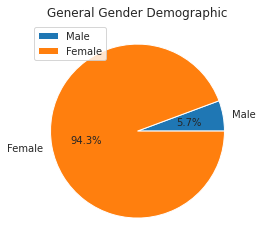

# of males with persistency flag: 
77
# of females with persistency flag: 
1212
# of males without persistency flag: 
117
# of females without persistency flag: 
2018


Text(0, 0.5, 'Flag')

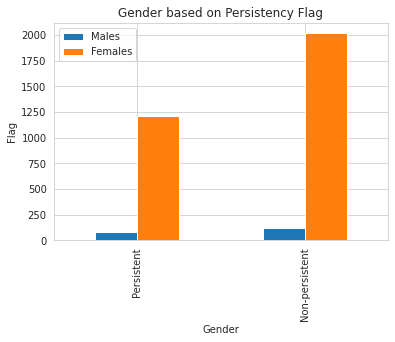

In [152]:
#Gender

#gender general
Male = df['Gender']
counts = pd.Series(Male).value_counts()
print("General # of males: ")
print(counts.get('Male'))

Female = df['Gender']
counts = pd.Series(Female).value_counts()
print("General # of females: ")
print(counts.get('Female'))

y = np.array([194,3230])
mylabels = ["Male", "Female"]
plot =plt.title("General Gender Demographic")
plot =plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plot =plt.legend()
plot =plt.legend(title = "Gender:")
plt.legend(loc='upper left')
plt.show()

#Based on flag
Male = Persistency_Data['Gender']
counts = pd.Series(Male).value_counts()
print("# of males with persistency flag: ")
print(counts.get('Male'))

Female = Persistency_Data['Gender']
counts = pd.Series(Female).value_counts()
print("# of females with persistency flag: ")
print(counts.get('Female'))

Male = Nonpersistency_Data['Gender']
counts = pd.Series(Male).value_counts()
print("# of males without persistency flag: ")
print(counts.get('Male'))

Female = Nonpersistency_Data['Gender']
counts = pd.Series(Female).value_counts()
print("# of females without persistency flag: ")
print(counts.get('Female'))

plotdata = pd.DataFrame({
    "Males": [77,117],
    "Females": [1212,2018]
},
index = ["Persistent", "Non-persistent"]
)
plotdata.plot(kind="bar")
plt.title("Gender based on Persistency Flag")
plt.xlabel("Gender")
plt.ylabel("Flag")

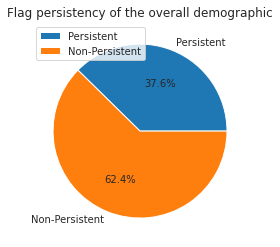

In [153]:
#General
y = np.array([1289, 2135])
mylabels = ['Persistent', 'Non-Persistent']
plot =plt.title("Flag persistency of the overall demographic")
plot =plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plot =plt.legend()
plot =plt.legend(title = "Flag:")
plt.legend(loc='upper left')
plt.show()

Text(0, 0.5, 'Flag')

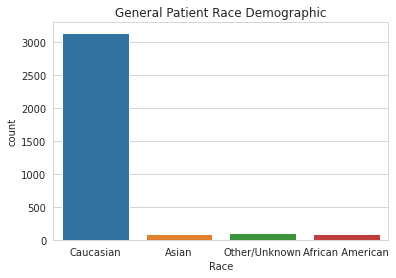

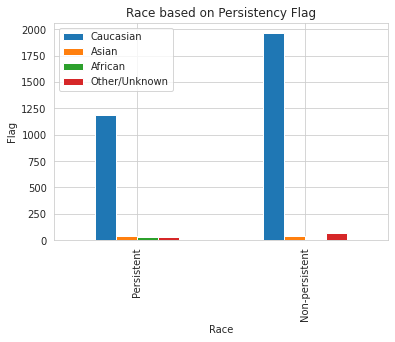

In [154]:
#Race

df_categorical['Race'].unique()
sea.countplot(data = df_categorical, x = 'Race').set(title='General Patient Race Demographic')

plotdata = pd.DataFrame({
    "Caucasian": [1185,1963],
    "Asian": [41,43],
    "African": [30,0],
    "Other/Unknown": [33,64]
},
index = ["Persistent", "Non-persistent"]
)
plotdata.plot(kind="bar")
plt.title("Race based on Persistency Flag")
plt.xlabel("Race")
plt.ylabel("Flag")

# Persistent: caucasian-1185 Asian-41 African-30 other-33
# Non-persistent: caucasian-1963 Asian -43 African- 0 other-64

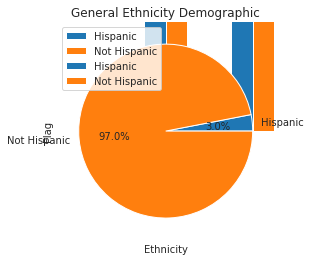

In [155]:
#Ethnicity

plotdata = pd.DataFrame({
    "Hispanic": [1255,2064],
    "Not Hispanic": [34,34],
},
index = ["Persistent", "Non-persistent"]
)
plotdata.plot(kind="bar")
plt.title("Ethnicity based on Persistency Flag")
plt.xlabel("Ethnicity")
plt.ylabel("Flag")

y = np.array([104,3319])
mylabels = ["Hispanic", "Not Hispanic"]
plot =plt.title("General Ethnicity Demographic")
plot =plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plot =plt.legend()
plot =plt.legend(title = "Ethnicity::")
plt.legend(loc='upper left')
plt.show()

Text(0, 0.5, 'Flag')

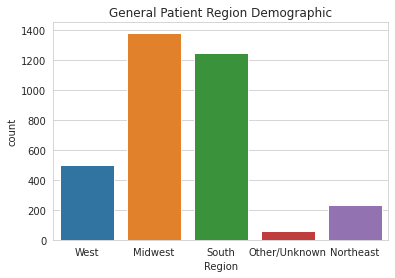

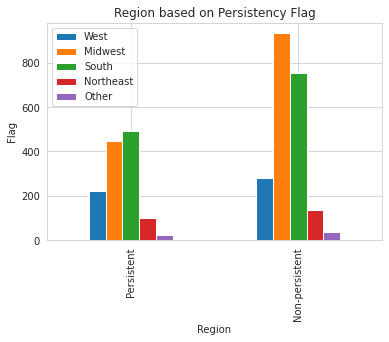

In [156]:
#Region
df_categorical['Region'].unique()
sea.countplot(data = df_categorical, x = 'Region').set(title='General Patient Region Demographic')

#Not- West:279 Midwest: 934 South: 753 Other:35 Northeast:134
#Is- West: 223 Midwest: 449 South: 494 Other: 25 Northeast-98

plotdata = pd.DataFrame({
    "West": [223,279],
    "Midwest": [449,934],
    "South": [494,753],
    "Northeast": [98,134],
    "Other": [25,35]
},
index = ["Persistent", "Non-persistent"]
)
plotdata.plot(kind="bar")
plt.title("Region based on Persistency Flag")
plt.xlabel("Region")
plt.ylabel("Flag")

Text(0, 0.5, 'Flag')

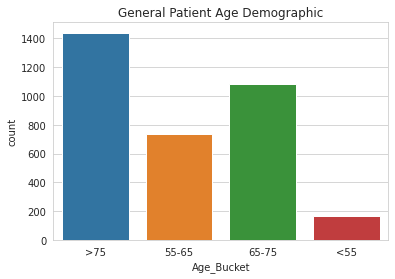

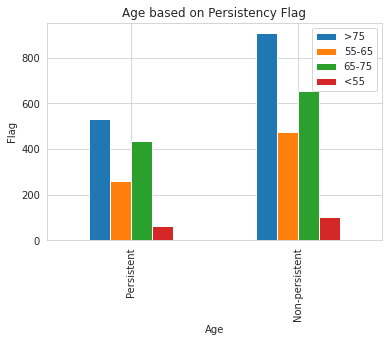

In [157]:
#Age
df_categorical['Age_Bucket'].unique()
sea.countplot(data = df_categorical, x = 'Age_Bucket').set(title='General Patient Age Demographic')

#Persistent: >75:532  55-65:261  65-75:433  <55:63
#Not: >75:907  55-65:472  65-75:653  <55:103

plotdata = pd.DataFrame({
    ">75": [532,907],
    "55-65": [261,472],
    "65-75": [433,653],
    "<55": [63,103]
},
index = ["Persistent", "Non-persistent"]
)
plotdata.plot(kind="bar")
plt.title("Age based on Persistency Flag")
plt.xlabel("Age")
plt.ylabel("Flag")

In [158]:
#Medical demographic information
#idn
print("Idn_Indicator")
print("Idn_Indicator")
tracker = df_categorical["Idn_Indicator"].value_counts()
percent100 = df_categorical["Idn_Indicator"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
flag_conditions = pd.DataFrame({'counts': tracker, 'Percent': percent100})
print(flag_conditions)

#glucose
print("Glucose Information")
print("Gluco_Record_Prior_Ntm")
tracker = df_categorical["Gluco_Record_Prior_Ntm"].value_counts()
percent100 = df_categorical["Gluco_Record_Prior_Ntm"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
flag_conditions = pd.DataFrame({'counts': tracker, 'Percent': percent100})
print(flag_conditions)
print("Gluco_Record_During_Rx")
tracker = df_categorical["Gluco_Record_During_Rx"].value_counts()
percent100 = df_categorical["Gluco_Record_During_Rx"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
flag_conditions = pd.DataFrame({'counts': tracker, 'Percent': percent100})
print(flag_conditions)

print("Dexa Information")
print("Dexa_During_Rx")
tracker = df_categorical["Dexa_During_Rx"].value_counts()
percent100 = df_categorical["Dexa_During_Rx"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
flag_conditions = pd.DataFrame({'counts': tracker, 'Percent': percent100})
print(flag_conditions)

print("Frag_Frac Information")
print("Frag_Frac_Prior_Ntm")
tracker = df_categorical["Frag_Frac_Prior_Ntm"].value_counts()
percent100 = df_categorical["Frag_Frac_Prior_Ntm"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
flag_conditions = pd.DataFrame({'counts': tracker, 'Percent': percent100})
print(flag_conditions)
print("Frag_Frac_During_Rx")
tracker = df_categorical["Frag_Frac_During_Rx"].value_counts()
percent100 = df_categorical["Frag_Frac_During_Rx"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
flag_conditions = pd.DataFrame({'counts': tracker, 'Percent': percent100})
print(flag_conditions)

print("Tscore Information")
print("Frag_Frac_Prior_Ntm")
tracker = df_categorical["Frag_Frac_Prior_Ntm"].value_counts()
percent100 = df_categorical["Frag_Frac_Prior_Ntm"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
flag_conditions = pd.DataFrame({'counts': tracker, 'Percent': percent100})
print(flag_conditions)
print("Frag_Frac_During_Rx")
tracker = df_categorical["Frag_Frac_During_Rx"].value_counts()
percent100 = df_categorical["Frag_Frac_During_Rx"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
flag_conditions = pd.DataFrame({'counts': tracker, 'Percent': percent100})
print(flag_conditions)

Idn_Indicator
Idn_Indicator
   counts Percent
Y    2557   74.7%
N     867   25.3%
Glucose Information
Gluco_Record_Prior_Ntm
   counts Percent
N    2619   76.5%
Y     805   23.5%
Gluco_Record_During_Rx
   counts Percent
N    2522   73.7%
Y     902   26.3%
Dexa Information
Dexa_During_Rx
   counts Percent
N    2488   72.7%
Y     936   27.3%
Frag_Frac Information
Frag_Frac_Prior_Ntm
   counts Percent
N    2872   83.9%
Y     552   16.1%
Frag_Frac_During_Rx
   counts Percent
N    3007   87.8%
Y     417   12.2%
Tscore Information
Frag_Frac_Prior_Ntm
   counts Percent
N    2872   83.9%
Y     552   16.1%
Frag_Frac_During_Rx
   counts Percent
N    3007   87.8%
Y     417   12.2%


In [159]:
#@title Chi Square Test For Disease/Treatment Factors
#H0 : The two categorical variables are independent
#H1 : The two categorical variables are dependent

from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import chi2_contingency 
import numpy as np

dependent = []
for i in df_categorical.columns[2:]:
  chisqt = pd.crosstab(df_categorical.Persistency_Flag, df_categorical[i], margins=True)
  value = np.array([chisqt.iloc[0][:-1].values,
                    chisqt.iloc[1][:-1].values])
  print(chi2_contingency(value)[0:3])
  alpha = 0.05
  p = chi2_contingency(value)[1]
  print(f'{i}\n_____________________________________')
  print("p value is " + str(p))
  if p <= alpha:
      print('Dependent (reject H0)')
      dependent.append(i)
  else:
      print('Independent (H0 holds true)')


(0.2797564735954279, 0.5968608769715079, 1)
Gender
_____________________________________
p value is 0.5968608769715079
Independent (H0 holds true)
(6.492450112770932, 0.08996072887774287, 3)
Race
_____________________________________
p value is 0.08996072887774287
Independent (H0 holds true)
(0.9185880588655042, 0.3378459751928265, 1)
Ethnicity
_____________________________________
p value is 0.3378459751928265
Independent (H0 holds true)
(30.19083549992387, 4.475541847690054e-06, 4)
Region
_____________________________________
p value is 4.475541847690054e-06
Dependent (reject H0)
(3.875326376854729, 0.27524514781855647, 3)
Age_Bucket
_____________________________________
p value is 0.27524514781855647
Independent (H0 holds true)
(179.02695287143794, 1.3142081919635601e-21, 34)
Ntm_Speciality
_____________________________________
p value is 1.3142081919635601e-21
Dependent (reject H0)
(65.94031182438059, 4.647874698934194e-16, 1)
Ntm_Specialist_Flag
___________________________________

In [160]:
dependent_df = df_categorical[dependent]

In [161]:
dependent_df

,Region,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_During_Rx,Dexa_During_Rx,Frag_Frac_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,...,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hypogonadism,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Immobilization
0,West,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,N,No change,NaN,Adherent,...,N,N,N,N,N,N,N,N,N,N
1,West,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,N,No change,No change,Adherent,...,N,N,N,N,N,N,N,N,N,N
2,Midwest,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,N,No change,No change,Adherent,...,N,N,N,N,N,N,N,N,N,N
3,Midwest,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,N,N,No change,No change,Adherent,...,N,Y,N,N,Y,N,N,N,N,N
4,Midwest,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,N,N,No change,No change,Adherent,...,N,N,N,N,Y,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,South,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,N,NaN,NaN,Adherent,...,N,N,N,N,N,N,Y,N,N,N
3420,South,ENDOCRINOLOGY,Others,OB/GYN/Others/PCP/Unknown,N,N,N,No change,Worsened,Non-Adherent,...,N,N,N,N,N,N,N,N,N,N
3421,South,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,N,Y,N,No change,Worsened,Adherent,...,Y,N,N,N,N,N,Y,N,N,N
3422,South,ENDOCRINOLOGY,Others,OB/GYN/Others/PCP/Unknown,N,N,Y,No change,Worsened,Adherent,...,N,N,N,N,N,N,N,N,N,N


In [162]:
#@title Transforming the data 
catMap = {i:{} for i in dependent_df.columns}
for i in dependent_df:
  valSet =set(dependent_df[i])
  if valSet == {'N', 'Y'}:
    dependent_df[i].replace(['N', 'Y'], [0,1], inplace=True)
  else:
    valList = tuple(valSet)
    mapping = [i for i in range(1, len(valList)+1)]
    catMap[i].update({valList:tuple(mapping)})
    dependent_df[i].replace(valList , mapping, inplace=True)
      

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [163]:
print(catMap)

{'Region': {('Northeast', 'Midwest', 'Other/Unknown', 'West', 'South'): (1, 2, 3, 4, 5)}, 'Ntm_Speciality': {('OBSTETRICS AND GYNECOLOGY', nan, 'ENDOCRINOLOGY', 'PSYCHIATRY AND NEUROLOGY', 'UROLOGY', 'TRANSPLANT SURGERY', 'ORTHOPEDICS', 'HEMATOLOGY & ONCOLOGY', 'SURGERY AND SURGICAL SPECIALTIES', 'RADIOLOGY', 'OTOLARYNGOLOGY', 'GENERAL PRACTITIONER', 'PATHOLOGY', 'PULMONARY MEDICINE', 'PLASTIC SURGERY', 'OCCUPATIONAL MEDICINE', 'HOSPICE AND PALLIATIVE MEDICINE', 'NUCLEAR MEDICINE', 'PHYSICAL MEDICINE AND REHABILITATION', 'NEUROLOGY', 'CLINICAL NURSE SPECIALIST', 'HOSPITAL MEDICINE', 'CARDIOLOGY', 'RHEUMATOLOGY', 'PEDIATRICS', 'PODIATRY', 'VASCULAR SURGERY', 'ORTHOPEDIC SURGERY', 'OPHTHALMOLOGY', 'OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY', 'PAIN MEDICINE', 'GASTROENTEROLOGY', 'EMERGENCY MEDICINE', 'ONCOLOGY', 'NEPHROLOGY', 'GERIATRIC MEDICINE'): (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 3

In [164]:
dependent_df

,Region,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_During_Rx,Dexa_During_Rx,Frag_Frac_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,...,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hypogonadism,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Immobilization
0,4,12,1,2,0,0,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,4,12,1,2,0,0,0,1,3,2,...,0,0,0,0,0,0,0,0,0,0
2,2,12,1,2,0,0,0,1,3,2,...,0,0,0,0,0,0,0,0,0,0
3,2,12,1,2,1,0,0,1,3,2,...,0,1,0,0,1,0,0,0,0,0
4,2,12,1,2,1,0,0,1,3,2,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,5,12,1,2,0,0,0,2,1,2,...,0,0,0,0,0,0,1,0,0,0
3420,5,3,1,2,0,0,0,1,2,1,...,0,0,0,0,0,0,0,0,0,0
3421,5,3,2,3,0,1,0,1,2,2,...,1,0,0,0,0,0,1,0,0,0
3422,5,3,1,2,0,0,1,1,2,2,...,0,0,0,0,0,0,0,0,0,0


Conclusion: In order to create our classification model, we should use the new dataframe created that showes all the dependent factors associated with drug persistency. 